In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [169]:
df = pd. read_pickle('../input/dataset/Dataset.pkl') 

In [170]:
df

{'LabAnalysis':     %Time  irr_PH  irr_EC  irr_NH4  irr_K  irr_Na  irr_Ca  irr_Mg  irr_Si  \
 0   43836     5.3     4.3     1.10   15.2     0.3     9.6     4.9   0.090   
 1   43850     5.2     4.0     1.10   11.3     0.3     9.8     4.1   0.090   
 2   43864     4.8     3.9     1.30   11.6     0.3    10.2     3.5   0.090   
 3   43879     4.8     3.7     1.40   13.3     0.4     8.2     2.8   0.090   
 4   43893     4.7     3.5     1.10   11.3     0.4     7.6     2.5   0.010   
 5   43908     5.4     3.4     1.30   13.4     0.3     6.5     1.9   0.009   
 6   43921     5.6     3.1     1.20   11.0     0.2     5.6     2.0   0.009   
 7   43936     5.7     2.9     1.20    9.3     0.3     6.4     2.7   0.009   
 8   43951     6.0     3.6     0.80   13.6     0.3     8.3     3.2   0.010   
 9   43963     5.7     3.0     0.80    9.1     0.2     6.2     2.1   0.010   
 10  43836     4.3     5.1     1.10   15.1     0.3     9.7     5.0   0.090   
 11  43850     5.6     4.0     0.50   17.1     0.

In [171]:
with open('../input/dataset/Dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [172]:
data.keys()

dict_keys(['LabAnalysis', 'Resources', 'TomQuality', 'Production', 'CropParameters', 'GrodanSens', 'GreenhouseClimate'])

Exploratory Data Analysis on Production Dataset

In [173]:
prod_df=data['Production']
prod_df.shape

(140, 9)

In [174]:
prod_df.head(10)

,%time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,43880,0.037,0.0,0.1,50.0,NaN,128.0,0,0
1,43885,0.767,0.0,0.9,54.5,136.0,1271.0,0,0
2,43889,0.232,0.0,0.6,51.0,89.0,788.0,0,0
3,43894,0.778,0.0,1.5,55.1,226.0,2001.0,0,0
4,43899,0.248,0.0,0.9,53.6,133.0,1144.0,0,0
5,43903,0.354,0.0,0.7,52.4,83.0,811.0,0,0
6,43908,0.795,0.0,1.0,53.3,126.0,1230.0,0,0
7,43913,0.486,0.0,0.9,54.9,148.0,1297.5,0,0
8,43917,0.454,0.0,0.9,52.6,126.0,1069.0,0,0
9,43922,0.697,0.0,0.6,54.0,92.0,777.0,0,0


In [175]:
prod_df.rename(columns = {'%time':'Time',}, inplace = True)

In [176]:
prod_df["Time"]= pd.to_datetime(prod_df["Time"])

In [177]:
prod_df.info

<bound method DataFrame.info of                              Time  ProdA  ProdB  avg_nr_harvested_trusses  \
0   1970-01-01 00:00:00.000043880  0.037    0.0                       0.1   
1   1970-01-01 00:00:00.000043885  0.767    0.0                       0.9   
2   1970-01-01 00:00:00.000043889  0.232    0.0                       0.6   
3   1970-01-01 00:00:00.000043894  0.778    0.0                       1.5   
4   1970-01-01 00:00:00.000043899  0.248    0.0                       0.9   
..                            ...    ...    ...                       ...   
135 1970-01-01 00:00:00.000043964  0.720    0.0                       1.0   
136 1970-01-01 00:00:00.000043969  0.790    0.0                       0.6   
137 1970-01-01 00:00:00.000043973  0.860    0.0                       1.1   
138 1970-01-01 00:00:00.000043977  0.670    0.0                       0.9   
139 1970-01-01 00:00:00.000043980  1.110    0.1                       1.3   

     Truss development time   Nr_fruits_Cla

In [178]:
prod_df.describe()

,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
count,140.000000,140.000000,138.000000,139.000000,134.000000,140.000000,140.000000,140.000000
mean,0.593343,0.014044,0.942029,49.333094,132.798507,1261.910714,1.685714,17.807143
std,0.240515,0.075209,0.387545,4.840445,54.861655,557.100878,8.216570,84.159740
min,0.010000,0.000000,0.100000,31.800000,0.000000,0.000000,0.000000,0.000000
25%,0.407500,0.000000,0.700000,46.800000,89.250000,829.500000,0.000000,0.000000
50%,0.611500,0.000000,0.950000,50.000000,133.500000,1279.500000,0.000000,0.000000
75%,0.745000,0.000000,1.200000,53.000000,167.750000,1613.250000,0.000000,0.000000
max,1.213000,0.600000,2.500000,60.000000,313.000000,2810.000000,74.000000,677.000000


In [179]:
prod_df.columns

Index(['Time', 'ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB'],
      dtype='object')

In [180]:
prod_df.dtypes

Time                        datetime64[ns]
ProdA                              float64
ProdB                              float64
avg_nr_harvested_trusses           float64
Truss development time             float64
Nr_fruits_ClassA                   float64
Weight_fruits_ClassA               float64
Nr_fruits_ClassB                     int64
Weight_fruits_ClassB                 int64
dtype: object

In [181]:
res_prod=list(prod_df.columns.values)
res_prod.remove('Time')

In [182]:
prod_df.nunique()

Time                         25
ProdA                        88
ProdB                        17
avg_nr_harvested_trusses     20
Truss development time       55
Nr_fruits_ClassA             99
Weight_fruits_ClassA        136
Nr_fruits_ClassB              9
Weight_fruits_ClassB          9
dtype: int64

In [183]:
prod_df.duplicated().sum()

0

In [184]:
prod_df.isnull().sum()

Time                        0
ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    2
Truss development time      1
Nr_fruits_ClassA            6
Weight_fruits_ClassA        0
Nr_fruits_ClassB            0
Weight_fruits_ClassB        0
dtype: int64

In [185]:
prod_df.replace(np.nan,'0',inplace = True)

In [186]:
prod_df.isnull().sum()

Time                        0
ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    0
Truss development time      0
Nr_fruits_ClassA            0
Weight_fruits_ClassA        0
Nr_fruits_ClassB            0
Weight_fruits_ClassB        0
dtype: int64

In [187]:
prod_df.columns

Index(['Time', 'ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB'],
      dtype='object')

In [188]:
prod_df.dtypes

Time                        datetime64[ns]
ProdA                              float64
ProdB                              float64
avg_nr_harvested_trusses            object
Truss development time              object
Nr_fruits_ClassA                    object
Weight_fruits_ClassA               float64
Nr_fruits_ClassB                     int64
Weight_fruits_ClassB                 int64
dtype: object

In [189]:
for i in res_prod:
    prod_df[i] = prod_df[i].astype(float)

In [190]:
prod_df.dtypes

Time                        datetime64[ns]
ProdA                              float64
ProdB                              float64
avg_nr_harvested_trusses           float64
Truss development time             float64
Nr_fruits_ClassA                   float64
Weight_fruits_ClassA               float64
Nr_fruits_ClassB                   float64
Weight_fruits_ClassB               float64
dtype: object

In [191]:
corelation=prod_df.corr()
corelation

,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
ProdA,1.000000,0.169947,0.656612,-0.115570,0.593554,0.657412,0.117998,0.136591
ProdB,0.169947,1.000000,0.330636,-0.251322,-0.023095,0.020132,0.654168,0.641112
avg_nr_harvested_trusses,0.656612,0.330636,1.000000,-0.024195,0.788638,0.827764,0.346406,0.351060
Truss development time,-0.115570,-0.251322,-0.024195,1.000000,0.234475,0.117482,-0.189175,-0.203213
Nr_fruits_ClassA,0.593554,-0.023095,0.788638,0.234475,1.000000,0.920510,0.021262,0.016610
Weight_fruits_ClassA,0.657412,0.020132,0.827764,0.117482,0.920510,1.000000,0.078810,0.096932
Nr_fruits_ClassB,0.117998,0.654168,0.346406,-0.189175,0.021262,0.078810,1.000000,0.985262
Weight_fruits_ClassB,0.136591,0.641112,0.351060,-0.203213,0.016610,0.096932,0.985262,1.000000


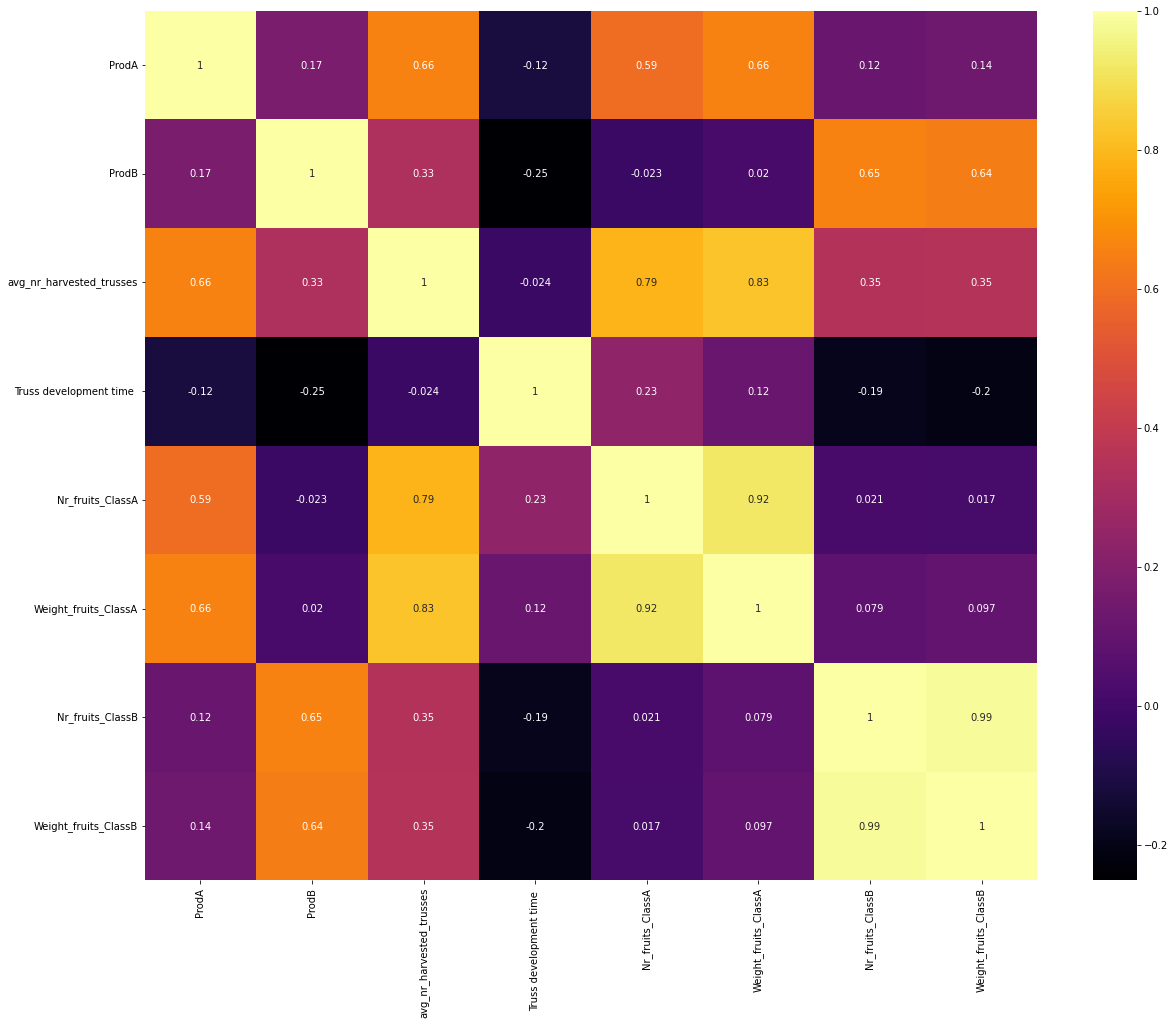

In [192]:
plt.rcParams['figure.figsize'] = [20, 16]
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,cmap='inferno')
plt.show()

In [193]:
prod_df['ProdA']

0      0.037
1      0.767
2      0.232
3      0.778
4      0.248
       ...  
135    0.720
136    0.790
137    0.860
138    0.670
139    1.110
Name: ProdA, Length: 140, dtype: float64

<Figure size 720x432 with 0 Axes>

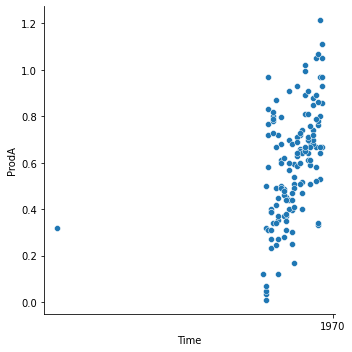

<Figure size 720x432 with 0 Axes>

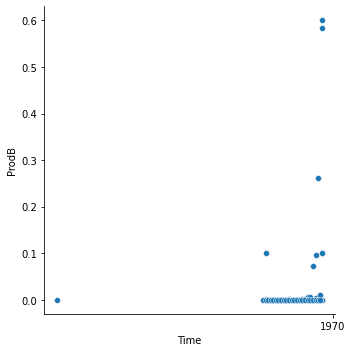

<Figure size 720x432 with 0 Axes>

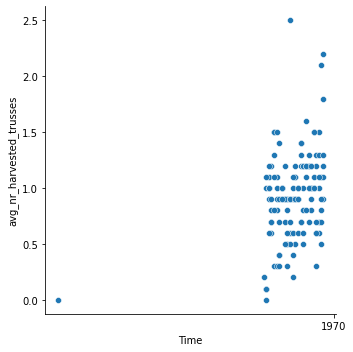

<Figure size 720x432 with 0 Axes>

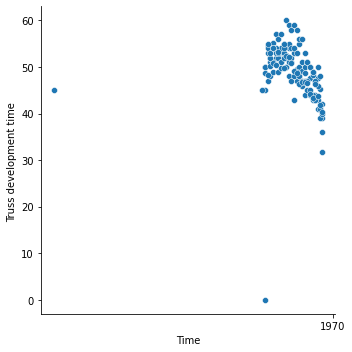

<Figure size 720x432 with 0 Axes>

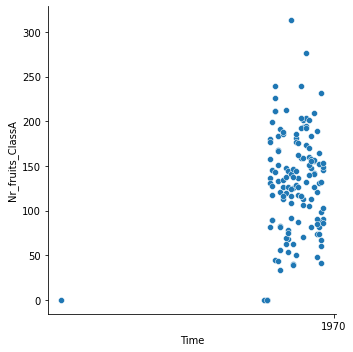

<Figure size 720x432 with 0 Axes>

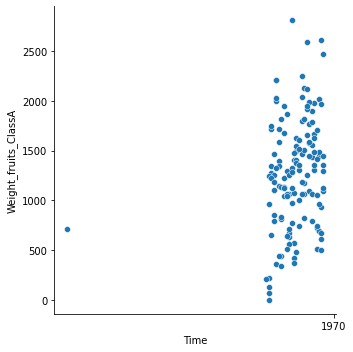

<Figure size 720x432 with 0 Axes>

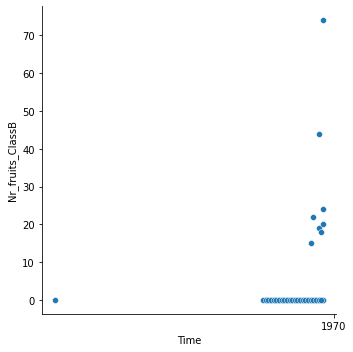

<Figure size 720x432 with 0 Axes>

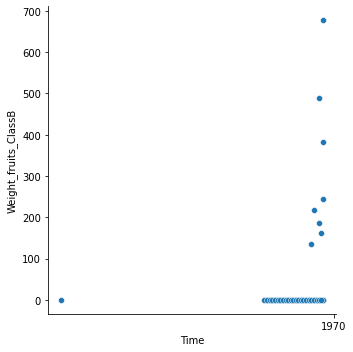

In [194]:
for i in res_prod:
    plt.figure(figsize=(10,6))
    sns.relplot(x='Time',y=i,data=prod_df)

<Figure size 720x432 with 0 Axes>

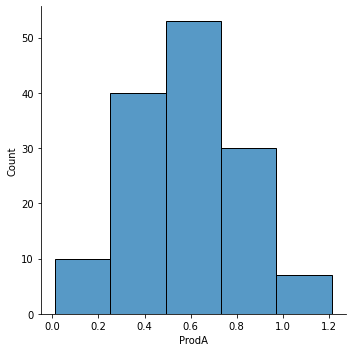

<Figure size 720x432 with 0 Axes>

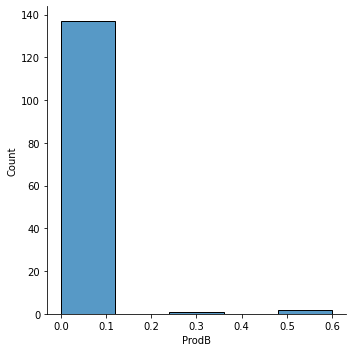

<Figure size 720x432 with 0 Axes>

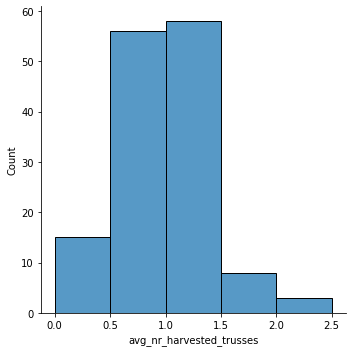

<Figure size 720x432 with 0 Axes>

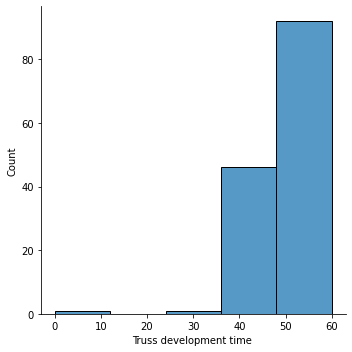

<Figure size 720x432 with 0 Axes>

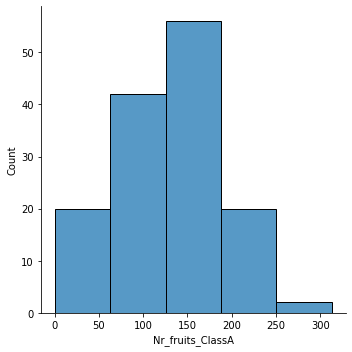

<Figure size 720x432 with 0 Axes>

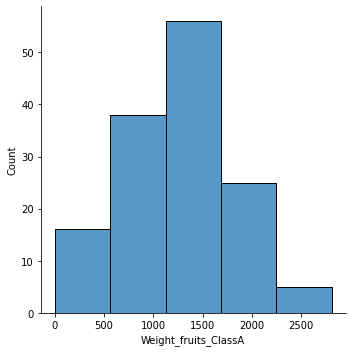

<Figure size 720x432 with 0 Axes>

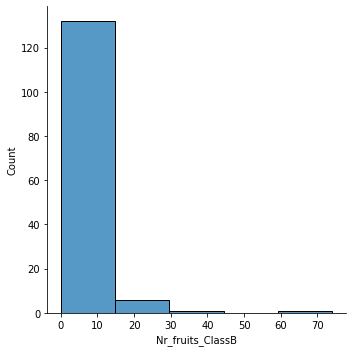

<Figure size 720x432 with 0 Axes>

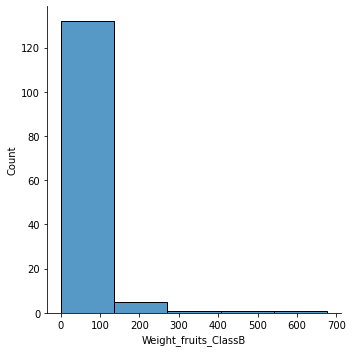

In [195]:
for i in res_prod:
    plt.figure(figsize=(10,6))
    sns.displot(prod_df[i],bins=5)